# ***Laptop Price Prediction***

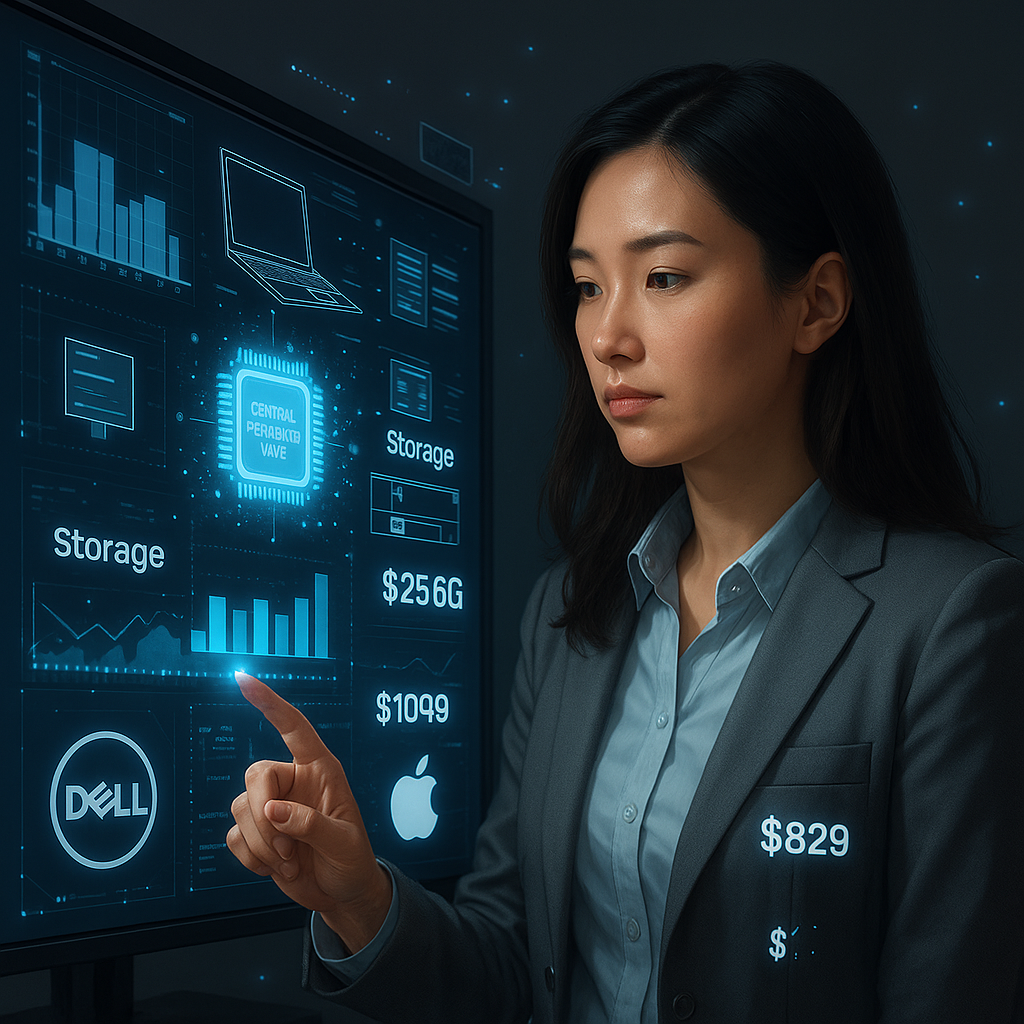

# *Problem Statement*

Accurately determining the fair market price of a laptop is challenging due to the wide variety of specifications, brands, and rapidly changing technology trends. There is often no easy way for buyers or sellers to know if a laptop is overpriced or underpriced based on its features. This creates uncertainty for consumers and difficulty for retailers when setting competitive prices.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# *Dataset Description*

This dataset, collected six months ago, contains comprehensive information on a wide range of laptops, covering their technical specifications, physical characteristics, and market details. It provides a solid foundation for analyzing trends and building predictive models to estimate laptop prices accurately based on recent market patterns.


*   **name**: The model or brand name of the laptop.
*   **price**: The price of the laptop (target for prediction).
*   **spec_score**: An overall score representing the laptop’s combined specifications.
*   **votes**: Number of votes or reviews received.
*   **user_rating**: Average user rating (e.g., stars out of 5).
*   **os**: Operating system (e.g., Windows, MacOS).
*   **utility**: Intended use category (e.g., Gaming, Business).
*   **thickness**: Physical thickness of the laptop.
*   **weight**: The weight of the laptop.
*   **warranty**: Warranty period offered.
*   **screen_size**: Size of the screen (in inches).
*   **resolution**: Screen resolution (e.g., 1920x1080).
*   **ppi**: Pixels per inch, showing screen sharpness.
*   **battery**: Battery capacity or backup time.
*   **screen_feature1**: Extra screen features (e.g., touchscreen).
*   **screen_feature2**: Additional screen features (e.g., IPS, OLED).
*   **processor_name**: Type of processor used.
*   **processor_speed**: Processor clock speed.
*   **no_cores**: Number of CPU cores
*   **caches**: Cache size of the processor.
*   **graphics_card**: GPU name or type if included.
*   **ram_memory**: RAM capacity.
*   **internal_memory**: Internal storage capacity.
*   **port_connection**: Physical port options available.
*   **wireless_connection**: Types of wireless connectivity.
*   **usb_ports**: Number and type of USB ports.
*   **hardware_features**: Other notable hardware features (e.g., fingerprint reader).


In [ ]:
df = pd.read_csv('/content/smartprix_full_df 2.csv')

In [ ]:
df.head(3)

,name,price,spec_score,votes,user_rating,os,utility,thickness,weight,warranty,screen_size,resolution,ppi,battery,screen_feature1,screen_feature2,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",70,97 votes,4.3,OS: Windows 11,Utility: Gaming,Thickness: 23.5 mmThick,2.29 kgHeavy,1 Year Warranty,15.6 inchesAverage,1920 x 1080 pixelsAverage,~ 141 PPIAverage,"52.5 Wh, 3 Cell BatteryGood",Touch Screen,Anti Glare,5th Gen AMD Ryzen 5 5600H,6 x 3.3 GHz (Turbo Speed upto 4.2 GHz) Cores,"Hexa Core, 12 Threads",16 MB Cache,"4 GB, AMD Radeon RX 6500M GraphicsLargest",8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone"
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78,71 votes,4.3,OS: Windows 11,Utility: Gaming,Thickness: 23.45 mmThick,2.7 kgHeavy,1 Year Warranty,16.1 inchesLarge,2560 x 1600 pixelsGood,~ 188 PPIHigh,80 Wh BatteryGood,Anti Glare,NaN,14th Gen Intel Core i9 14900HX,8 x 2.2 GHz (Turbo Speed upto 5.8 GHz) Perform...,"24 Cores (8P + 16E), 32 Threads",36 MB Cache,"8 GB, NVIDIA GeForce RTX 4060 GraphicsLargest",16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone"
2,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56,177 votes,4.4,OS: Windows 11,Utility: Performance,Thickness: 14.8 mmUltra Slim,1.56 kgAverage,1 Year Warranty,15.6 inchesLargest,1920 x 1080 pixelsAverage,~ 141 PPIAverage,70 Wh BatteryGood,Anti Glare,16:9 Aspect Ratio,11th Gen Intel Core i3 1115G4,2 x 3 GHz (Turbo Speed upto 4.1 GHz) Cores,"Dual Core, 4 Threads",6 MB Cache,Intel UHD Graphics Graphics,8 GB LPDDR4 RAMLargest,512 GB SSD,HDMI,"WiFi, Bluetooth","3 x USB 3.0, 2 x USB Type-C","Fingerprint Sensor, Backlit Keyboard, Inbuilt ..."


In [ ]:
df.shape

(1020, 27)

**Number of Instances**:1020.

**Number of Attributes**: 27.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1020 non-null   object 
 1   price                1020 non-null   object 
 2   spec_score           1020 non-null   int64  
 3   votes                1020 non-null   object 
 4   user_rating          1020 non-null   float64
 5   os                   1020 non-null   object 
 6   utility              1020 non-null   object 
 7   thickness            1019 non-null   object 
 8   weight               910 non-null    object 
 9   warranty             756 non-null    object 
 10  screen_size          1020 non-null   object 
 11  resolution           1020 non-null   object 
 12  ppi                  1020 non-null   object 
 13  battery              957 non-null    object 
 14  screen_feature1      924 non-null    object 
 15  screen_feature2      456 non-null    o

checking for duplicate values

In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

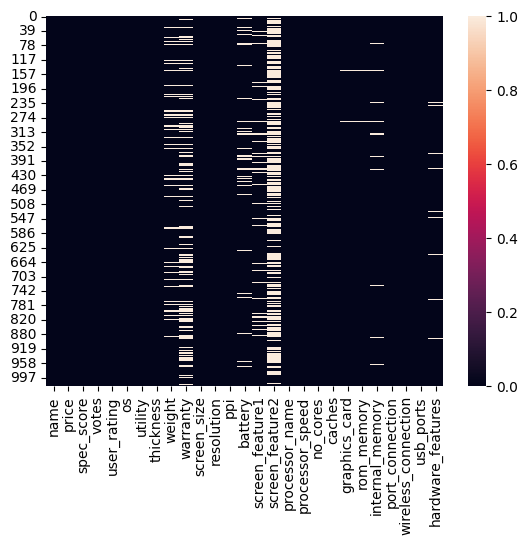

In [ ]:
sns.heatmap(df.isnull())

Heatmap to find the most null values

In [ ]:
df.drop(columns = ['spec_score','votes','user_rating','warranty','screen_feature2'],inplace = True)

In [ ]:
df['Brand'] = df['name'].str.split().apply(lambda x : x[0])

In [ ]:
df.head(3)

,name,price,os,utility,thickness,weight,screen_size,resolution,ppi,battery,screen_feature1,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",OS: Windows 11,Utility: Gaming,Thickness: 23.5 mmThick,2.29 kgHeavy,15.6 inchesAverage,1920 x 1080 pixelsAverage,~ 141 PPIAverage,"52.5 Wh, 3 Cell BatteryGood",Touch Screen,5th Gen AMD Ryzen 5 5600H,6 x 3.3 GHz (Turbo Speed upto 4.2 GHz) Cores,"Hexa Core, 12 Threads",16 MB Cache,"4 GB, AMD Radeon RX 6500M GraphicsLargest",8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",OS: Windows 11,Utility: Gaming,Thickness: 23.45 mmThick,2.7 kgHeavy,16.1 inchesLarge,2560 x 1600 pixelsGood,~ 188 PPIHigh,80 Wh BatteryGood,Anti Glare,14th Gen Intel Core i9 14900HX,8 x 2.2 GHz (Turbo Speed upto 5.8 GHz) Perform...,"24 Cores (8P + 16E), 32 Threads",36 MB Cache,"8 GB, NVIDIA GeForce RTX 4060 GraphicsLargest",16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi
2,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",OS: Windows 11,Utility: Performance,Thickness: 14.8 mmUltra Slim,1.56 kgAverage,15.6 inchesLargest,1920 x 1080 pixelsAverage,~ 141 PPIAverage,70 Wh BatteryGood,Anti Glare,11th Gen Intel Core i3 1115G4,2 x 3 GHz (Turbo Speed upto 4.1 GHz) Cores,"Dual Core, 4 Threads",6 MB Cache,Intel UHD Graphics Graphics,8 GB LPDDR4 RAMLargest,512 GB SSD,HDMI,"WiFi, Bluetooth","3 x USB 3.0, 2 x USB Type-C","Fingerprint Sensor, Backlit Keyboard, Inbuilt ...",Tecno


Feature Extraction on every attribute

In [ ]:
df['os'] = df['os'].str.split().apply(lambda x : x[1])

In [ ]:
df['os'] = df['os'].apply(lambda x : 'Other/Linux' if x != 'Windows' and x != 'Mac' else x)

In [ ]:
def extract_utility(value):
  length = len(value.split())
  if value.strip() == '':
    return 'Everyday'
  elif length>1:
    return 'ALL'
  elif length == 1:
    return value

In [ ]:
df['utility'] = df['utility'].str.replace(r'\bEveryday Use\b,?\s?|,\s?\bEveryday Use\b', '', regex=True).str.replace('Utility:','')

In [ ]:
df['utility'] = df['utility'].apply(extract_utility)

In [ ]:
df['weight'] = df['weight'].str.extract(r'^(\d+\.?\d*)').astype('float32')
df['weight'] = df['weight'].fillna(1.5)

In [ ]:
df['screen_size'] = df['screen_size'].str.extract(r'^(\d+\.?\d*)').astype('float32')

In [ ]:
df = df[~(df['resolution'] == '~ 283 PPIHighest')]

In [ ]:
df['resolution'] = df['resolution'].str.split().apply(lambda x :' '.join(x[0:3]))
res_vc = df['resolution'].value_counts()
df['resolution'] = df['resolution'].apply(lambda x :'1920 x 1080' if res_vc[x]<10 else x)

In [ ]:
df['X_res'] = df['resolution'].str.split().apply(lambda x:x[0]).astype('int32')
df['Y_res'] = df['resolution'].str.split().apply(lambda x:x[2]).astype('int32')

In [ ]:
df['ppi'] = df['ppi'].str.split().apply(lambda x:x[1]).astype('int32')

In [ ]:
df['battery'] = df['battery'].str.extract(r'^(\d+\.?\d*)').astype('float32')

In [ ]:
df.sample(4)

,name,price,os,utility,thickness,weight,screen_size,resolution,ppi,battery,screen_feature1,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res
457,Lenovo IdeaPad Flex 5 82R900D4IN Laptop (AMD R...,"₹64,990",Windows,Performance,1 Year Warranty,1.50,14.0,1920 x 1200,162,NaN,Touch Screen,5th Gen AMD Ryzen 7 5700U,8 x 1.8 GHz (Turbo Speed upto 4.3 GHz) Cores,"Octa Core, 16 Threads",8 MB Cache,AMD Radeon Graphics,16 GB DDR4 RAMAverage,512 GB SSD,"HDMI, Multi Card Reader","WiFi, Bluetooth v5.0","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Lenovo,1920,1200
380,Zebronics ZEB-NBC 2S 2023 Laptop (11th Gen Cor...,"₹27,490",Windows,Performance,Thickness: 20 mmThick,1.65,15.6,1920 x 1080,141,NaN,NaN,11th Gen Intel Core i5 1155G7,4 x 2.5 GHz (Turbo Speed upto 4.5 GHz) Cores,"Quad Core, 8 Threads",8 MB Cache,Intel Integrated UHD Graphics,8 GB LPDDR4X RAMLargest,512 GB SSD,HDMI,"WiFi, Bluetooth v5.0","2 x USB 3.0, 1 x USB Type-C",2 MP Camera,Zebronics,1920,1080
819,Dell Inspiron 5430 IN54304D6P9M01ORS1 Laptop (...,"₹88,990",Windows,Everyday,1 Year Warranty,1.50,14.0,1920 x 1080,141,54.0,Anti Glare,13th Gen Intel Core i7 1355U,2 x (Turbo Speed upto 5 GHz) Performance Cores...,"10 Cores (2P + 8E), 12 Threads",12 MB Cache,Intel Iris Xe Graphics Graphics,16 GB LPDDR5 RAMAverage,512 GB SSD,"HDMI, Multi Card Reader","WiFi, Bluetooth","2 x USB 3.0, 1 x USB Type-C","Fingerprint Sensor, Backlit Keyboard, Inbuilt ...",Dell,1920,1080
822,Asus Vivobook Go 15 E510MA-EJ011WS Laptop (Int...,"₹24,990",Windows,Performance,1.57 kgAverage,1.00,15.6,1920 x 1080,141,42.0,Anti Glare,Intel Celeron N4020,2 x 1.1 GHz (Turbo Speed upto 2.8 GHz) Cores,"Dual Core, 2 Threads",4 MB Cache,Intel UHD Integrated Graphics,8 GB DDR4 RAMLargest,256 GB SSD,HDMI,"WiFi, Bluetooth v4.1","1 x USB 2.0, 1 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Asus,1920,1080


In [ ]:
def extract_processor(value):
  if not (value[0].isnumeric()):
    return ' '.join(value.split()[:1]).strip().lower()
  else:
    return ' '.join(value.split()[2:5]).strip().lower()

In [ ]:
df['Processor Name'] = df['processor_name'].apply(extract_processor)

In [ ]:
processor_vc = df['Processor Name'].value_counts()

In [ ]:
df['Processor Name'] = df['Processor Name'].apply(lambda x : 'Other' if processor_vc[x]<10 else x)

In [ ]:
df['Processor Name'] = df['Processor Name'].str.capitalize()

In [ ]:
df.head(2)

,name,price,os,utility,thickness,weight,screen_size,resolution,ppi,battery,screen_feature1,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",Windows,Gaming,Thickness: 23.5 mmThick,2.29,15.6,1920 x 1080,141,52.5,Touch Screen,5th Gen AMD Ryzen 5 5600H,6 x 3.3 GHz (Turbo Speed upto 4.2 GHz) Cores,"Hexa Core, 12 Threads",16 MB Cache,"4 GB, AMD Radeon RX 6500M GraphicsLargest",8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",Windows,Gaming,Thickness: 23.45 mmThick,2.70,16.1,2560 x 1600,188,80.0,Anti Glare,14th Gen Intel Core i9 14900HX,8 x 2.2 GHz (Turbo Speed upto 5.8 GHz) Perform...,"24 Cores (8P + 16E), 32 Threads",36 MB Cache,"8 GB, NVIDIA GeForce RTX 4060 GraphicsLargest",16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9


In [ ]:
df['Processor Gen'] = df['processor_name'].str.split().apply(lambda x : x[0])

In [ ]:
def extract_gen(value):
  if value == 'Apple':
    return '13'
  elif value == 'Intel':
    return '5'
  else:
    return value

In [ ]:
df['Processor Gen'] = df['Processor Gen'].apply(extract_gen)
gen_vc = df['Processor Gen'].value_counts()

In [ ]:
df['Processor Gen'] = df['Processor Gen'].apply(lambda x : '3' if gen_vc[x]<10 else x)

In [ ]:
df['Processor Gen'] = df['Processor Gen'].str.extract(r'^(\d+\.?\d*)').astype('int32')

In [ ]:
df['No Cores'] = df['no_cores'].str.split().apply(lambda x : x[0])

In [ ]:
def extract_cores(value):
  if value == 'Hexa':
    return '6'
  elif value == 'Octa':
    return '8'
  elif value == 'Quad':
    return '4'
  elif value == 'Dual':
    return '2'
  else:
    return value

In [ ]:
df['No Cores'] = df['No Cores'].apply(extract_cores)
cores_vc = df['No Cores'].value_counts()
df['No Cores'] = df['No Cores'].apply(lambda x :'2' if cores_vc[x]<10 else x)

In [ ]:
def extract_threads(value):
  if not 'Threads' in value:
    return '4'
  else:
    return value

In [ ]:
df['Threads'] = df['no_cores'].str.split(',').apply(lambda x : x[-1])
df['Threads'] = df['Threads'].apply(extract_threads)

In [ ]:
df['Threads'] = df['Threads'].str.replace('Threads','').str.strip().astype('int32')

In [ ]:
df.head(2)

,name,price,os,utility,thickness,weight,screen_size,resolution,ppi,battery,screen_feature1,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",Windows,Gaming,Thickness: 23.5 mmThick,2.29,15.6,1920 x 1080,141,52.5,Touch Screen,5th Gen AMD Ryzen 5 5600H,6 x 3.3 GHz (Turbo Speed upto 4.2 GHz) Cores,"Hexa Core, 12 Threads",16 MB Cache,"4 GB, AMD Radeon RX 6500M GraphicsLargest",8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5,5,6,12
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",Windows,Gaming,Thickness: 23.45 mmThick,2.70,16.1,2560 x 1600,188,80.0,Anti Glare,14th Gen Intel Core i9 14900HX,8 x 2.2 GHz (Turbo Speed upto 5.8 GHz) Perform...,"24 Cores (8P + 16E), 32 Threads",36 MB Cache,"8 GB, NVIDIA GeForce RTX 4060 GraphicsLargest",16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9,14,24,32


In [ ]:
def extract_gpu_brand(value):
  if pd.isnull(value):
    return 'Intel'
  elif 'nvidia' in value:
    return 'Nvidia'
  elif 'amd' in value or 'radeon' in value:
    return 'AMD'
  elif 'intel' in value:
    return 'Intel'
  else:
    return 'Intel'

In [ ]:
df['GPU_Brand'] = df['graphics_card'].str.lower().apply(extract_gpu_brand)

In [ ]:
def extract_gpu_model(value):
    if pd.isnull(value):
        return 'INTEGRATED'

    value = str(value).upper()

    match = re.search(r'\b(RTX|GTX|MX|RX|VEGA|IRIS|UHD|RADEON|ARC|INTEGRATED)\b', value)
    if match:
        return match.group(1)
    else:
        return 'INTEGRATED'

In [ ]:
df['GPU_Model'] = df['graphics_card'].apply(extract_gpu_model)

In [ ]:
gpu_type_map = {
    'RTX': 1,
    'GTX': 1,
    'ARC': 1,
    'RADEON': 1,
    'IRIS': 0,
    'UHD': 0,
    'INTEGRATED': 0
}

In [ ]:
df['GPU_Type'] = df['GPU_Model'].map(gpu_type_map)

In [ ]:
df.head(3)

,name,price,os,utility,thickness,weight,screen_size,resolution,ppi,battery,screen_feature1,processor_name,processor_speed,no_cores,caches,graphics_card,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads,GPU_Brand,GPU_Model,GPU_Type
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",Windows,Gaming,Thickness: 23.5 mmThick,2.29,15.6,1920 x 1080,141,52.5,Touch Screen,5th Gen AMD Ryzen 5 5600H,6 x 3.3 GHz (Turbo Speed upto 4.2 GHz) Cores,"Hexa Core, 12 Threads",16 MB Cache,"4 GB, AMD Radeon RX 6500M GraphicsLargest",8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5,5,6,12,AMD,RADEON,1
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",Windows,Gaming,Thickness: 23.45 mmThick,2.70,16.1,2560 x 1600,188,80.0,Anti Glare,14th Gen Intel Core i9 14900HX,8 x 2.2 GHz (Turbo Speed upto 5.8 GHz) Perform...,"24 Cores (8P + 16E), 32 Threads",36 MB Cache,"8 GB, NVIDIA GeForce RTX 4060 GraphicsLargest",16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9,14,24,32,Nvidia,RTX,1
2,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",Windows,Performance,Thickness: 14.8 mmUltra Slim,1.56,15.6,1920 x 1080,141,70.0,Anti Glare,11th Gen Intel Core i3 1115G4,2 x 3 GHz (Turbo Speed upto 4.1 GHz) Cores,"Dual Core, 4 Threads",6 MB Cache,Intel UHD Graphics Graphics,8 GB LPDDR4 RAMLargest,512 GB SSD,HDMI,"WiFi, Bluetooth","3 x USB 3.0, 2 x USB Type-C","Fingerprint Sensor, Backlit Keyboard, Inbuilt ...",Tecno,1920,1080,Intel core i3,11,2,4,Intel,UHD,0


In [ ]:
df.drop(columns = ['thickness','screen_feature1','processor_name','processor_speed','no_cores','caches','graphics_card'],inplace = True)

In [ ]:
df.head(2)

,name,price,os,utility,weight,screen_size,resolution,ppi,battery,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads,GPU_Brand,GPU_Model,GPU_Type
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",Windows,Gaming,2.29,15.6,1920 x 1080,141,52.5,8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5,5,6,12,AMD,RADEON,1
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",Windows,Gaming,2.70,16.1,2560 x 1600,188,80.0,16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9,14,24,32,Nvidia,RTX,1


In [ ]:
df['Ram'] = df['rom_memory'].str.extract(r'^(\d+)').fillna('4').astype('int32')

In [ ]:
df['Ram_Type'] = df['rom_memory'].str.upper().str.extract(r'(DDR\d|LPDDR\d)')

In [ ]:
df['SSD'] = df['internal_memory'].str.extract(r'(\d+)')

In [ ]:
all_ports = ','.join(df['port_connection'].dropna().astype(str)).split(',')
all_ports = [port.strip() for port in all_ports]

unique_ports = sorted(set(all_ports))
print(unique_ports)

['Bluetooth', 'Bluetooth v5.0', 'Bluetooth v5.1', 'Bluetooth v5.2', 'Display Port', 'Ethernet (LAN)', 'HDMI', 'Multi Card Reader', 'Thunderbolt', 'VGA', 'WiFi']


In [ ]:
port_counts = Counter(all_ports)
print(port_counts)

Counter({'HDMI': 951, 'Ethernet (LAN)': 443, 'Multi Card Reader': 322, 'Thunderbolt': 278, 'Display Port': 26, 'WiFi': 14, 'Bluetooth v5.1': 6, 'Bluetooth': 5, 'VGA': 3, 'Bluetooth v5.2': 3, 'Bluetooth v5.0': 1})


In [ ]:
df['HDMI_port'] = df['port_connection'].apply(lambda x : 1 if 'HDMI' in x else 0)
df['LAN_port'] = df['port_connection'].apply(lambda x : 1 if 'Ethernet (LAN)' in x else 0)

In [ ]:
def extract_and_sum_numbers(text):

  if pd.isnull(text):
    return 'null'

  matches = re.findall(r'(\d+)\s*x\s*USB', text)
  if matches:
      total_sum = sum(int(match) for match in matches)
      return str(total_sum)
  else:
      return text

In [ ]:
df.head(3)

,name,price,os,utility,weight,screen_size,resolution,ppi,battery,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads,GPU_Brand,GPU_Model,GPU_Type,Ram,Ram_Type,SSD,HDMI_port,LAN_port
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹49,800",Windows,Gaming,2.29,15.6,1920 x 1080,141,52.5,8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5,5,6,12,AMD,RADEON,1,8,DDR4,512,1,1
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",Windows,Gaming,2.70,16.1,2560 x 1600,188,80.0,16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB 2.0, 3 x USB 3.0, 1 x USB Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9,14,24,32,Nvidia,RTX,1,16,DDR5,1,1,0
2,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",Windows,Performance,1.56,15.6,1920 x 1080,141,70.0,8 GB LPDDR4 RAMLargest,512 GB SSD,HDMI,"WiFi, Bluetooth","3 x USB 3.0, 2 x USB Type-C","Fingerprint Sensor, Backlit Keyboard, Inbuilt ...",Tecno,1920,1080,Intel core i3,11,2,4,Intel,UHD,0,8,LPDDR4,512,1,0


In [ ]:
df['usb_ports'] = df['usb_ports'].str.replace('USB 3.0','USB').str.replace('USB 2.0','USB').str.replace('USB Type-C','Type-C')

In [ ]:
df['USB_Port'] = df['usb_ports'].apply(extract_and_sum_numbers)

In [ ]:
df['Type-C'] = df['usb_ports'].fillna('null').str.split(',').apply(lambda x : x[-1]).apply(lambda x : x.split()[0])
df['Type-C'] = df['Type-C'].apply(lambda x : x if x.isnumeric() else '1').astype('int32')

In [ ]:
df['price'] = df['price'].str.replace('₹','').str.replace(',','').astype('int64')

In [ ]:
df.head(2)

,name,price,os,utility,weight,screen_size,resolution,ppi,battery,rom_memory,internal_memory,port_connection,wireless_connection,usb_ports,hardware_features,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads,GPU_Brand,GPU_Model,GPU_Type,Ram,Ram_Type,SSD,HDMI_port,LAN_port,USB_Port,Type-C
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,49800,Windows,Gaming,2.29,15.6,1920 x 1080,141,52.5,8 GB DDR4 RAMAverage,512 GB SSD,"Ethernet (LAN), HDMI, Multi Card Reader","WiFi, Bluetooth v5.3","2 x USB, 1 x Type-C","Backlit Keyboard, Inbuilt Microphone",HP,1920,1080,Amd ryzen 5,5,6,12,AMD,RADEON,1,8,DDR4,512,1,1,2,1
1,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,102990,Windows,Gaming,2.70,16.1,2560 x 1600,188,80.0,16 GB DDR5 RAMLargest,1 TB SSD,"HDMI, Display Port, Thunderbolt, Multi Card Re...","WiFi, Bluetooth v5.3","1 x USB, 3 x USB, 1 x Type-C","Backlit Keyboard, Inbuilt Microphone",Xiaomi,2560,1600,Intel core i9,14,24,32,Nvidia,RTX,1,16,DDR5,1,1,0,4,1


In [ ]:
df.drop(columns = ['name','rom_memory','internal_memory','port_connection','wireless_connection','usb_ports','hardware_features'],inplace=True)

In [ ]:
df.shape

(997, 25)

Number of Instances after Data Preprocessing:1020.

Number of Attributes after Data Preprocessing: 27.

In [ ]:
df.head(2)

,price,os,utility,weight,screen_size,resolution,ppi,battery,Brand,X_res,Y_res,Processor Name,Processor Gen,No Cores,Threads,GPU_Brand,GPU_Model,GPU_Type,Ram,Ram_Type,SSD,HDMI_port,LAN_port,USB_Port,Type-C
0,49800,Windows,Gaming,2.29,15.6,1920 x 1080,141,52.5,HP,1920,1080,Amd ryzen 5,5,6,12,AMD,RADEON,1,8,DDR4,512,1,1,2,1
1,102990,Windows,Gaming,2.70,16.1,2560 x 1600,188,80.0,Xiaomi,2560,1600,Intel core i9,14,24,32,Nvidia,RTX,1,16,DDR5,1,1,0,4,1


In [ ]:
df.drop(columns=['No Cores','Threads','GPU_Type','resolution'],inplace=True)

In [ ]:
df['X_res'].value_counts()

,count
X_res,
1920,811
2560,75
1366,51
2880,49
3840,11


In [ ]:
df.shape

(997, 21)

In [ ]:
df.head(2)

,price,os,utility,weight,screen_size,ppi,battery,Brand,X_res,Y_res,Processor Name,Processor Gen,GPU_Brand,GPU_Model,Ram,Ram_Type,SSD,HDMI_port,LAN_port,USB_Port,Type-C
0,49800,Windows,Gaming,2.29,15.6,141,52.5,HP,1920,1080,Amd ryzen 5,5,AMD,RADEON,8,DDR4,512,1,1,2,1
1,102990,Windows,Gaming,2.70,16.1,188,80.0,Xiaomi,2560,1600,Intel core i9,14,Nvidia,RTX,16,DDR5,1,1,0,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1019
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           997 non-null    int64  
 1   os              997 non-null    object 
 2   utility         997 non-null    object 
 3   weight          997 non-null    float32
 4   screen_size     997 non-null    float32
 5   ppi             997 non-null    int32  
 6   battery         934 non-null    float32
 7   Brand           997 non-null    object 
 8   X_res           997 non-null    int32  
 9   Y_res           997 non-null    int32  
 10  Processor Name  997 non-null    object 
 11  Processor Gen   997 non-null    int32  
 12  GPU_Brand       997 non-null    object 
 13  GPU_Model       997 non-null    object 
 14  Ram             997 non-null    int32  
 15  Ram_Type        944 non-null    object 
 16  SSD             957 non-null    object 
 17  HDMI_port       997 non-null    int64  

In [ ]:
df['SSD'] = df['SSD'].fillna('256').astype('int32')

In [ ]:
df['USB_Port'] = df['USB_Port'].apply(lambda x : x if x.isnumeric() else '2').astype('int32')

In [ ]:
df.duplicated().sum()

np.int64(14)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
median_battery = df['battery'].median()
df['battery'] = df['battery'].fillna(median_battery)

In [ ]:
df['Ram_Type'] = df['Ram_Type'].fillna('DDR4')

In [ ]:
brand_vc = df['Brand'].value_counts()
df['Brand'] = df['Brand'].apply(lambda x : x if brand_vc[x]>10 else 'Others')

In [ ]:
df.sample(2)

,price,os,utility,weight,screen_size,ppi,battery,Brand,X_res,Y_res,Processor Name,Processor Gen,GPU_Brand,GPU_Model,Ram,Ram_Type,SSD,HDMI_port,LAN_port,USB_Port,Type-C
600,77990,Windows,Performance,1.8,16.0,142,50.0,Asus,1920,1200,Intel core i7,12,Nvidia,RTX,16,DDR4,512,1,0,2,1
694,26490,Windows,Performance,1.3,14.0,135,50.0,Lenovo,1366,768,Other,3,Intel,INTEGRATED,8,DDR4,256,1,0,2,1


In [ ]:
df['Ram_Type'] = df['Ram_Type'].apply(lambda x : 'DDR4'if (x == 'mode' or x == 'DDR3' or x == 'DDR6' or x == 'LPDDR3') else x)

In [ ]:
df['SSD'] = df['SSD'].apply(lambda x: x*1024 if x<5 else x)

In [ ]:
df.describe()

,price,weight,screen_size,ppi,battery,X_res,Y_res,Processor Gen,Ram,SSD,HDMI_port,LAN_port,USB_Port,Type-C
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,84836.346897,10.267986,15.214396,158.948118,49.311802,2008.449644,1168.512716,10.015259,23.728383,643.092574,0.954222,0.448627,2.242116,1.383520
std,69216.930577,89.589523,0.990595,37.107022,24.300697,354.588160,251.588901,3.362482,64.835955,326.943518,0.209110,0.497607,0.620735,0.560416
min,8000.000000,1.000000,11.600000,100.000000,2.000000,1366.000000,768.000000,3.000000,1.000000,32.000000,0.000000,0.000000,1.000000,1.000000
25%,45194.500000,1.450000,14.000000,141.000000,41.000000,1920.000000,1080.000000,7.000000,8.000000,512.000000,1.000000,0.000000,2.000000,1.000000
50%,64690.000000,1.650000,15.600000,141.000000,50.000000,1920.000000,1080.000000,12.000000,16.000000,512.000000,1.000000,0.000000,2.000000,1.000000
75%,96994.500000,1.990000,15.600000,162.000000,60.000000,1920.000000,1200.000000,13.000000,16.000000,1024.000000,1.000000,1.000000,3.000000,2.000000
max,599990.000000,998.000000,18.000000,323.000000,100.000000,3840.000000,2400.000000,14.000000,512.000000,4096.000000,1.000000,1.000000,4.000000,5.000000


In [ ]:
df_object = df.select_dtypes(include='object')

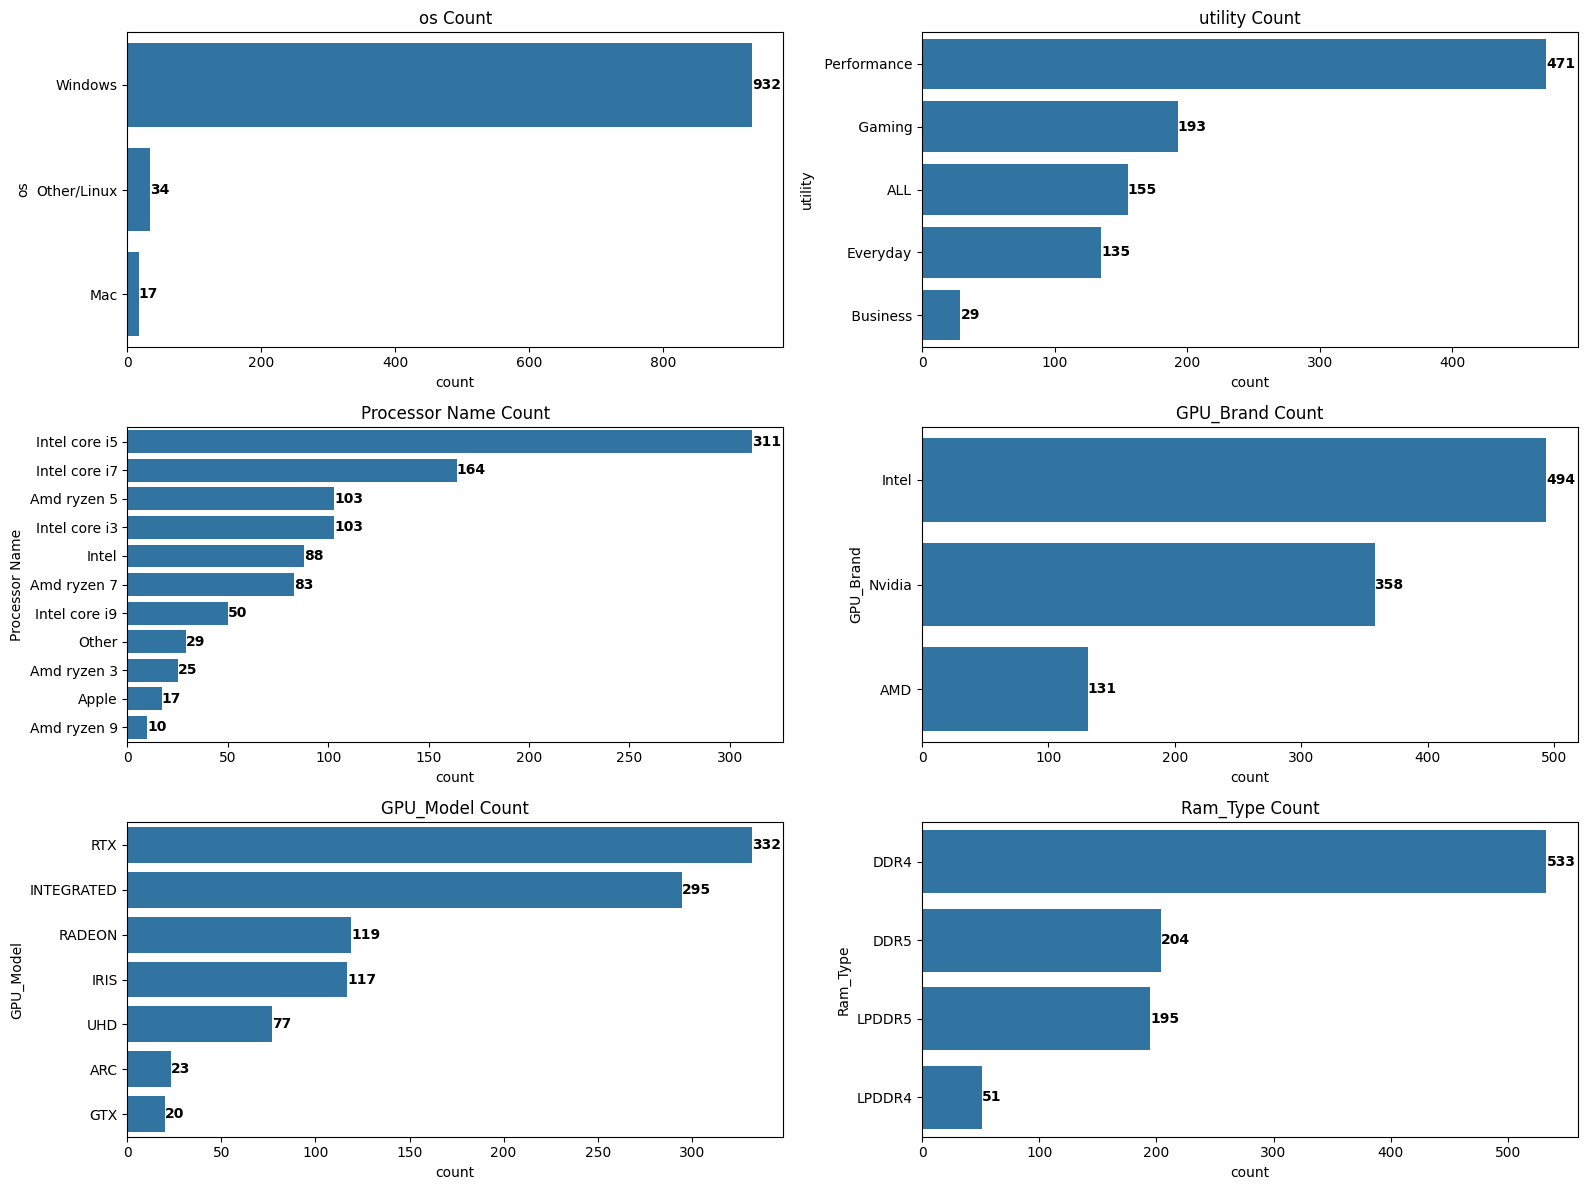

In [ ]:
columns = df.select_dtypes(include='object').drop('Brand',axis = 1).columns
fig,ax = plt.subplots(nrows=3 ,ncols=2,figsize=(16,12))

for idx,axis in enumerate(ax.flatten()):
  order_values = df[columns[idx]].value_counts().index
  p = sns.countplot(data=df,y=columns[idx],ax=axis,order=order_values)
  for container in p.containers:
    p.bar_label(container,fontweight = 'bold',padding=0)

  axis.set_title(f'{columns[idx]} Count')

plt.tight_layout()
plt.show()

Checknig the types of every attribute

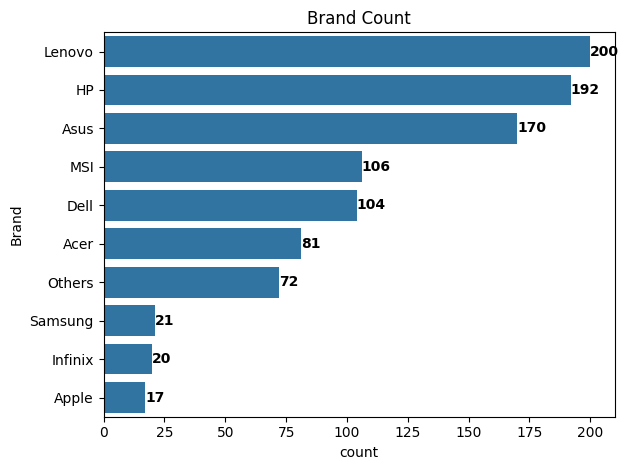

In [ ]:
order_values = df['Brand'].value_counts().index

p = sns.countplot(data=df,y='Brand',order=order_values)
for container in p.containers:
  p.bar_label(container,fontweight = 'bold',padding=0)

plt.title(f'Brand Count')
plt.tight_layout()
plt.show()

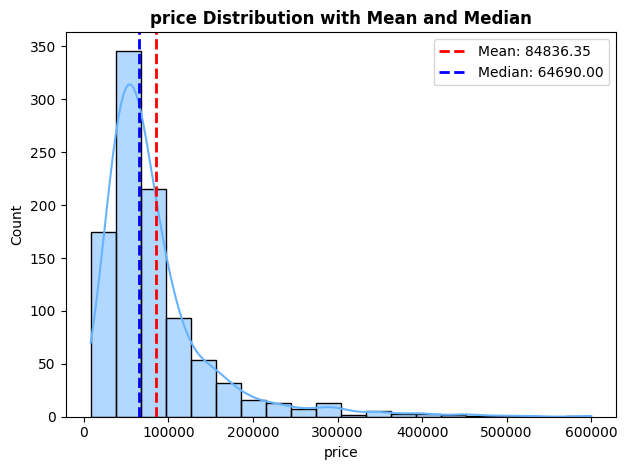

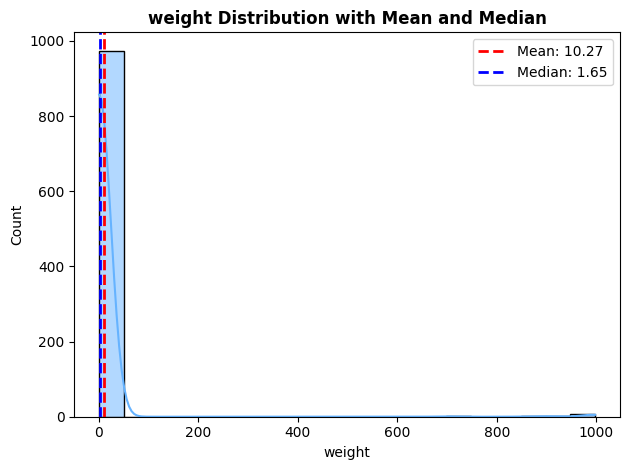

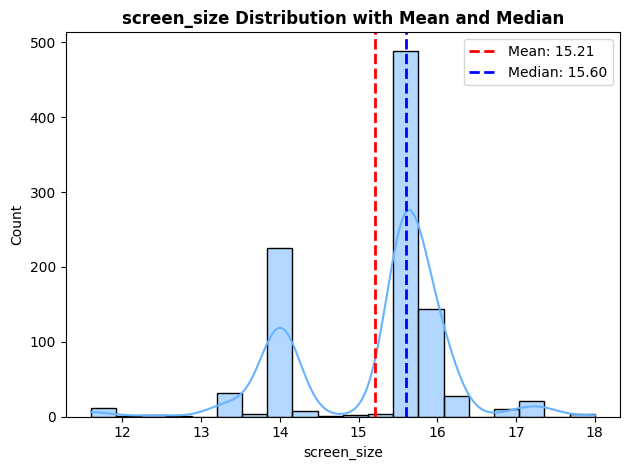

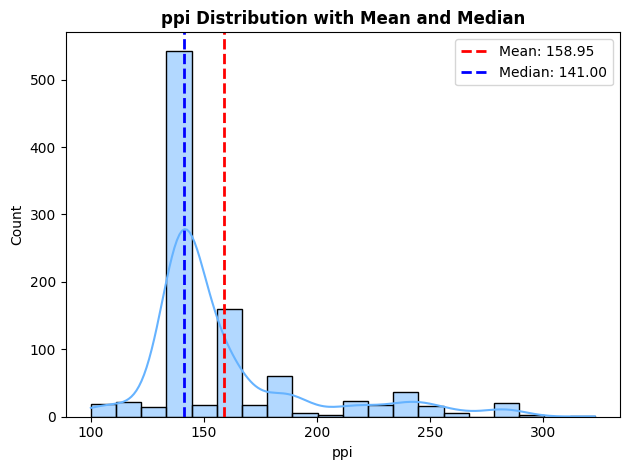

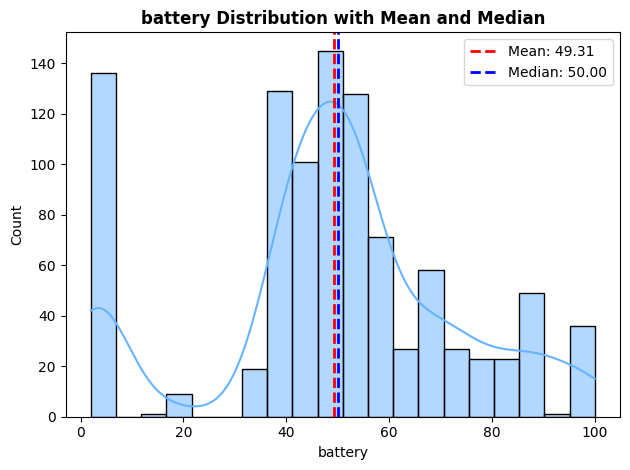

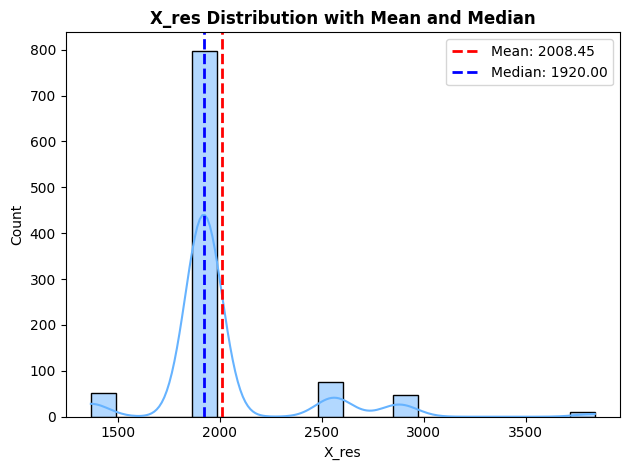

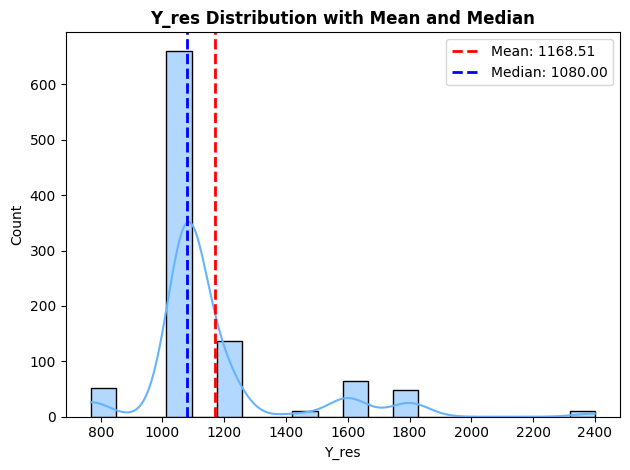

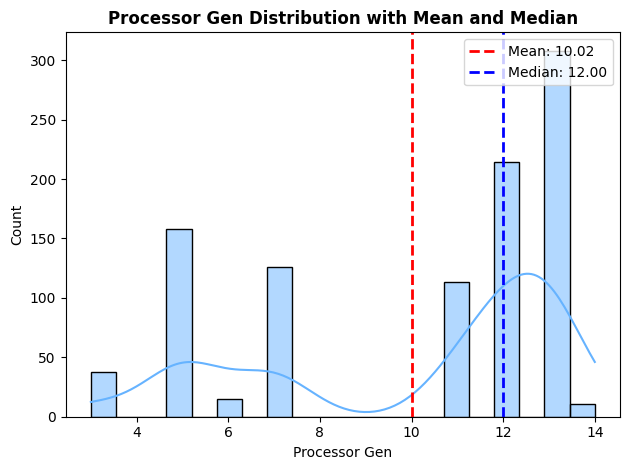

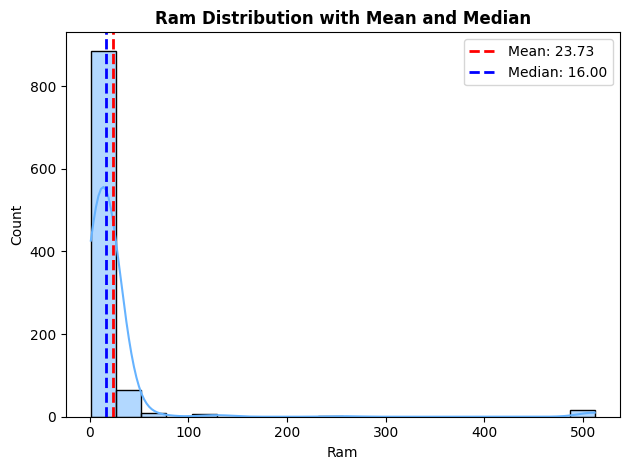

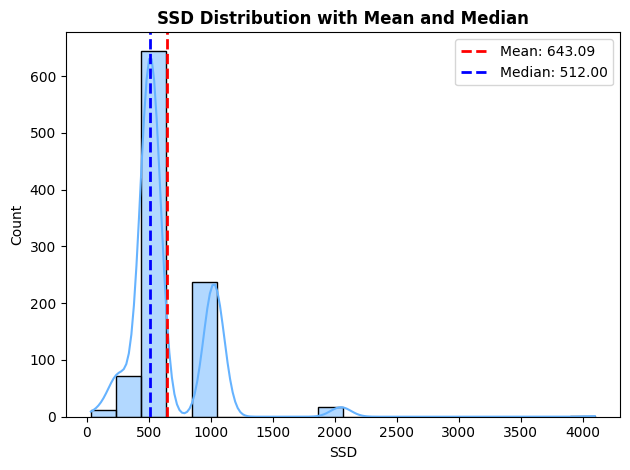

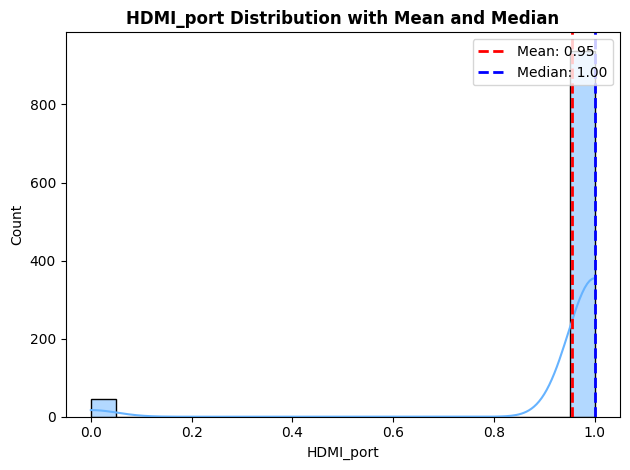

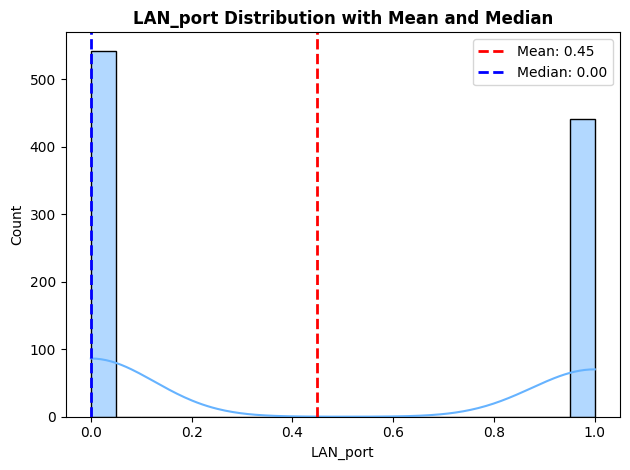

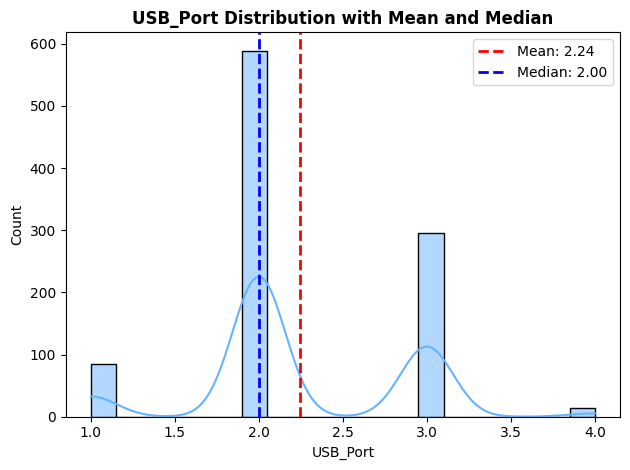

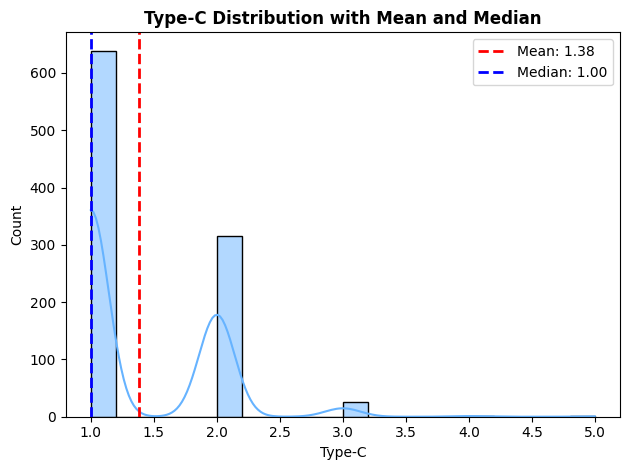

In [ ]:
columns = df.select_dtypes(include=['int32','int64','float32']).columns
for col in columns:
  sns.histplot(data=df,x=col,color='#66b3ff',kde=True,bins=20)

  mean_value = df[col].mean()
  median_value = df[col].median()

  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

  plt.legend(loc='upper right')
  plt.title(f'{col} Distribution with Mean and Median',fontweight='bold')
  plt.tight_layout()
  plt.show()

 checking for Skewness of the data.

In [ ]:
import numpy as np
df['price'] = np.log1p(df['price'])
df['weight'] = np.log1p(df['weight'])

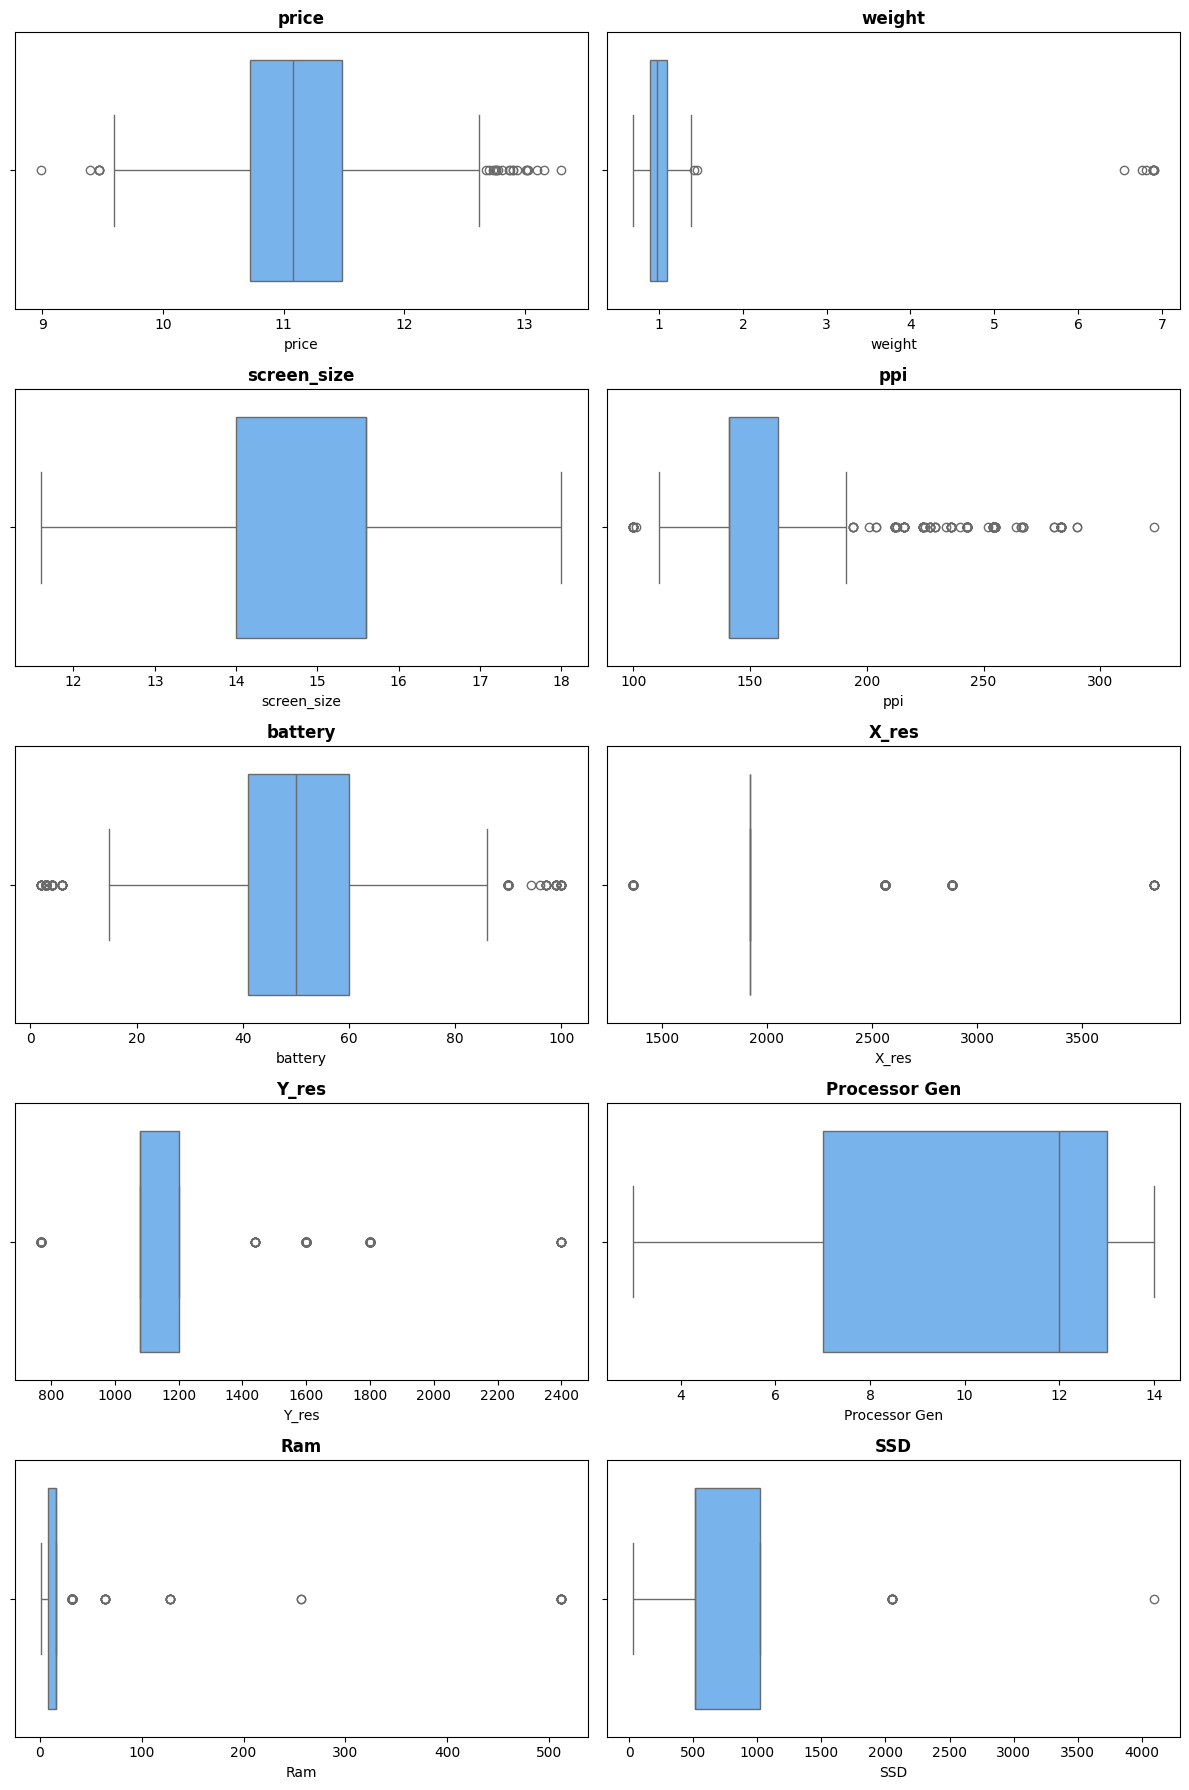

In [ ]:
columns = ['price', 'weight', 'screen_size', 'ppi', 'battery', 'X_res', 'Y_res',
           'Processor Gen', 'Ram', 'SSD']
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(12,18))

for idx,axis in enumerate(ax.flatten()):
  sns.boxplot(data=df,x=columns[idx],color='#66b3ff',ax=axis)
  axis.set_title(f'{columns[idx]}',fontweight='bold')

plt.tight_layout()
plt.show()

Checking for Outliers

In [ ]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                 np.where(df[column] > upper_bound, upper_bound, df[column]))

    return df

In [ ]:
columns = ['price', 'weight', 'screen_size', 'ppi', 'battery', 'Y_res',
           'Processor Gen', 'Ram', 'SSD']

for col in columns:
  df = iqr_capping(df,col)

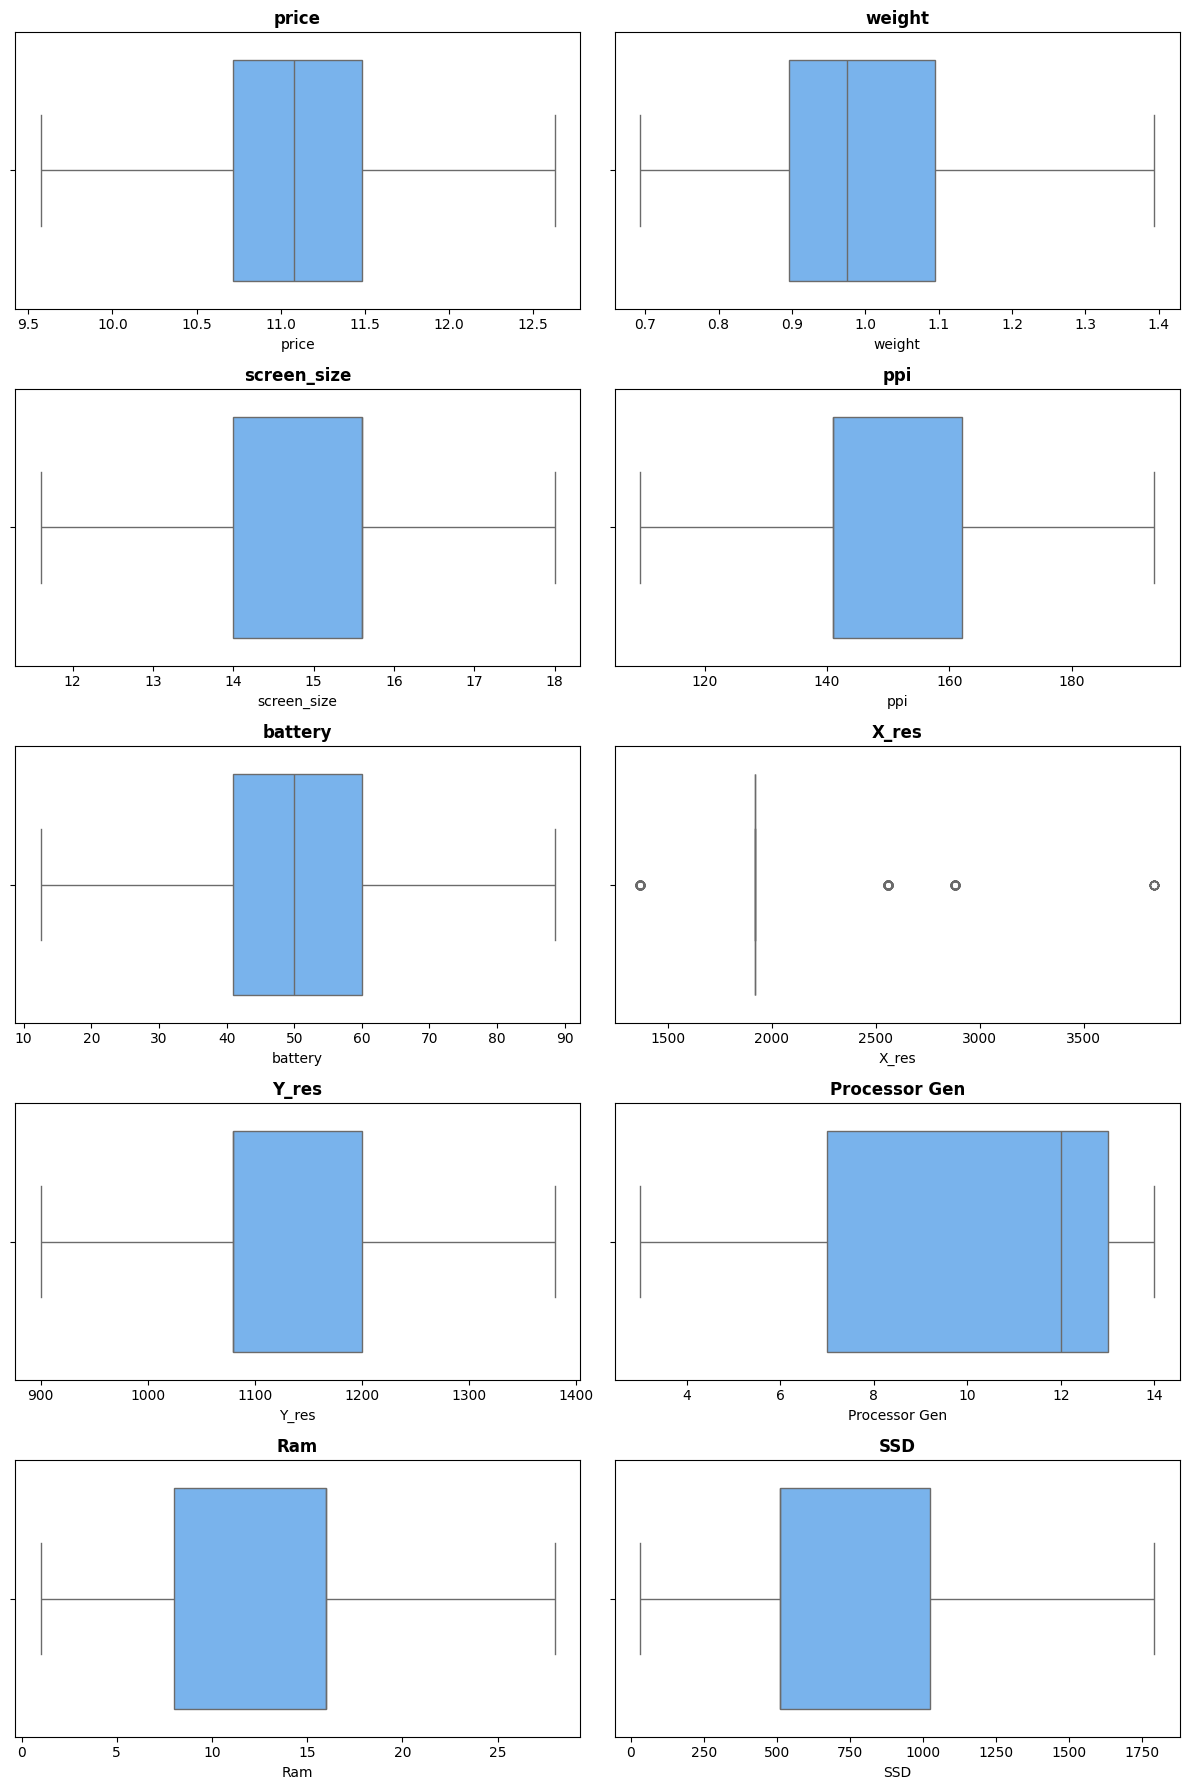

In [ ]:
columns = ['price', 'weight', 'screen_size', 'ppi', 'battery', 'X_res', 'Y_res',
           'Processor Gen', 'Ram', 'SSD']
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(12,18))

for idx,axis in enumerate(ax.flatten()):
  sns.boxplot(data=df,x=columns[idx],color='#66b3ff',ax=axis)
  axis.set_title(f'{columns[idx]}',fontweight='bold')

plt.tight_layout()
plt.show()

Handling outliers by Capping method

In [ ]:
df.head(100)

,price,os,utility,weight,screen_size,ppi,battery,Brand,X_res,Y_res,Processor Name,Processor Gen,GPU_Brand,GPU_Model,Ram,Ram_Type,SSD,HDMI_port,LAN_port,USB_Port,Type-C
0,10.815790,Windows,Gaming,1.190888,15.600000,141.0,52.500000,HP,1920,1080.0,Amd ryzen 5,5.0,AMD,RADEON,8.0,DDR4,512.0,1,1,2,1
1,11.542397,Windows,Gaming,1.308333,16.100000,188.0,80.000000,Others,2560,1380.0,Intel core i9,14.0,Nvidia,RTX,16.0,DDR5,1024.0,1,0,4,1
2,10.085434,Windows,Performance,0.940007,15.600000,141.0,70.000000,Others,1920,1080.0,Intel core i3,11.0,Intel,UHD,8.0,LPDDR4,512.0,1,0,3,2
3,11.050747,Windows,Everyday,1.394051,13.300000,166.0,50.000000,Samsung,1920,1080.0,Intel core i5,12.0,Intel,IRIS,16.0,LPDDR5,512.0,1,0,1,1
4,11.289669,Mac,Performance,0.828552,13.300000,193.5,49.900002,Apple,2560,1380.0,Apple,13.0,Intel,INTEGRATED,28.0,DDR4,256.0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.903037,Windows,Performance,0.943906,15.600000,141.0,50.000000,Asus,1920,1080.0,Intel,3.0,Intel,INTEGRATED,4.0,DDR4,256.0,1,0,2,1
96,10.485452,Windows,Performance,0.951658,15.600000,141.0,36.000000,Acer,1920,1080.0,Amd ryzen 5,5.0,AMD,INTEGRATED,16.0,DDR4,512.0,1,1,3,1
97,11.211699,Windows,Gaming,1.280934,17.299999,127.0,88.500000,Asus,1920,1080.0,Intel core i5,12.0,Nvidia,RTX,16.0,DDR5,512.0,1,1,2,2
98,9.573227,Windows,Performance,0.916291,14.100000,156.0,18.500000,Others,1920,1080.0,Intel,5.0,Intel,INTEGRATED,4.0,DDR4,128.0,1,0,2,1


In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

The dataset was split into training and testing sets to evaluate the model’s performance. The training data is used to teach the machine learning algorithms to learn patterns from laptop specifications and prices, while the testing data is used to check how well the trained model can predict prices for new, unseen laptops. This ensures the model generalizes well and avoids overfitting.

Importing libraries OneHotEncoder, StandardScaler, ColumnTransformer, and Pipeline from scikit-learn to perform feature encoding, scaling, combined column transformations, and to build a streamlined machine learning pipeline for training and prediction.”

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
transformer = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop="first",handle_unknown="ignore"),
 ['os', 'utility', 'Brand', 'Processor Name', 'GPU_Brand', 'GPU_Model','Ram_Type']),
                                              ('standar',StandardScaler(),['weight', 'screen_size', 'ppi', 'battery', 'X_res', 'Y_res',
       'Processor Gen', 'Ram', 'SSD'])],remainder="passthrough")

In [ ]:
X_train_tr = transformer.fit_transform(X_train)
X_test_tr = transformer.transform(X_test)

 Importing various machine learning models from scikit-learn to compare multiple algorithms and identify the best-performing model for predicting laptop prices accurately.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
models = {
    'Linear Regression' : LinearRegression(),
    'Gradient Descent' : SGDRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Gradient Boost' : GradientBoostingRegressor(),
    'XgBoost' : XGBRegressor(),
    'LightGBM' : LGBMRegressor(verbosity=-1)
}

In [ ]:
results = {}

Checking for performance matrix

In [ ]:
for name, model in models.items():
  print(f'{name} :')
  print()
  model.fit(X_train_tr,y_train)
  y_pred = model.predict(X_test_tr)

  print("MAE : ",mean_absolute_error(y_test,y_pred))
  print("MSE : ",mean_squared_error(y_test,y_pred))
  print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("R2 Score : ",r2_score(y_test,y_pred))
  print()

  results[name] = {
        'MAE': mean_absolute_error(y_test,y_pred),
        'MSE': mean_squared_error(y_test,y_pred),
        'RMSE':np.sqrt(mean_squared_error(y_test,y_pred)),
        'R²': r2_score(y_test,y_pred)
    }

Linear Regression :

MAE :  0.18429069765187847
MSE :  0.0673954076176022
RMSE :  0.2596062549662511
R2 Score :  0.8567771671548499

Gradient Descent :

MAE :  0.378408587310472
MSE :  0.28161558967428035
RMSE :  0.5306746552024888
R2 Score :  0.4015351497633268

Decision Tree :

MAE :  0.20730891951385474
MSE :  0.11599152926012697
RMSE :  0.34057529161717964
R2 Score :  0.753504934624987

Random Forest :

MAE :  0.16625437122959302
MSE :  0.0777508148371375
RMSE :  0.27883833100407396
R2 Score :  0.8347707603435406

ADA Boost :

MAE :  0.2350788658127696
MSE :  0.09477196073304449
RMSE :  0.3078505493466667
R2 Score :  0.7985989079924957

Gradient Boost :

MAE :  0.1621215877348185
MSE :  0.05904579231011587
RMSE :  0.24299339972541614
R2 Score :  0.8745210402135402

XgBoost :

MAE :  0.15718811913222255
MSE :  0.059559468854823
RMSE :  0.24404808717714424
R2 Score :  0.8734294196936897

LightGBM :

MAE :  0.15963364924557255
MSE :  0.05528630890345133
RMSE :  0.23513040829176332
R2 

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)

In [ ]:
results_df

,MAE,MSE,RMSE,R²
LightGBM,0.159634,0.055286,0.235130,0.882510
Gradient Boost,0.162122,0.059046,0.242993,0.874521
XgBoost,0.157188,0.059559,0.244048,0.873429
Linear Regression,0.184291,0.067395,0.259606,0.856777
Random Forest,0.166254,0.077751,0.278838,0.834771
ADA Boost,0.235079,0.094772,0.307851,0.798599
Decision Tree,0.207309,0.115992,0.340575,0.753505
Gradient Descent,0.378409,0.281616,0.530675,0.401535


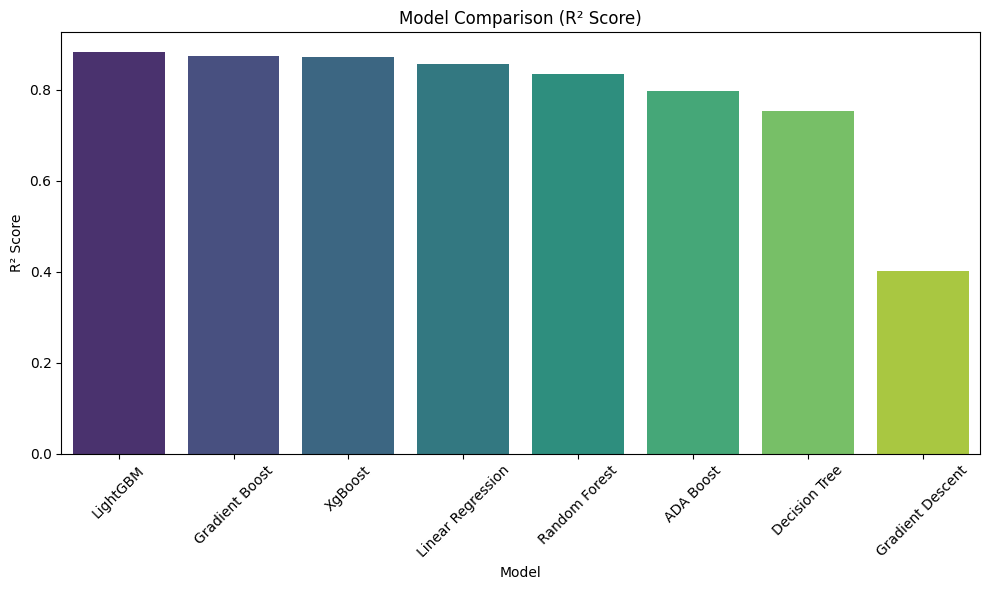

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R²'], palette='viridis')
plt.title('Model Comparison (R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar graph shows the R² scores of different machine learning models applied to the laptop price prediction dataset. By comparing these scores, we can identify which model predicts prices most accurately.

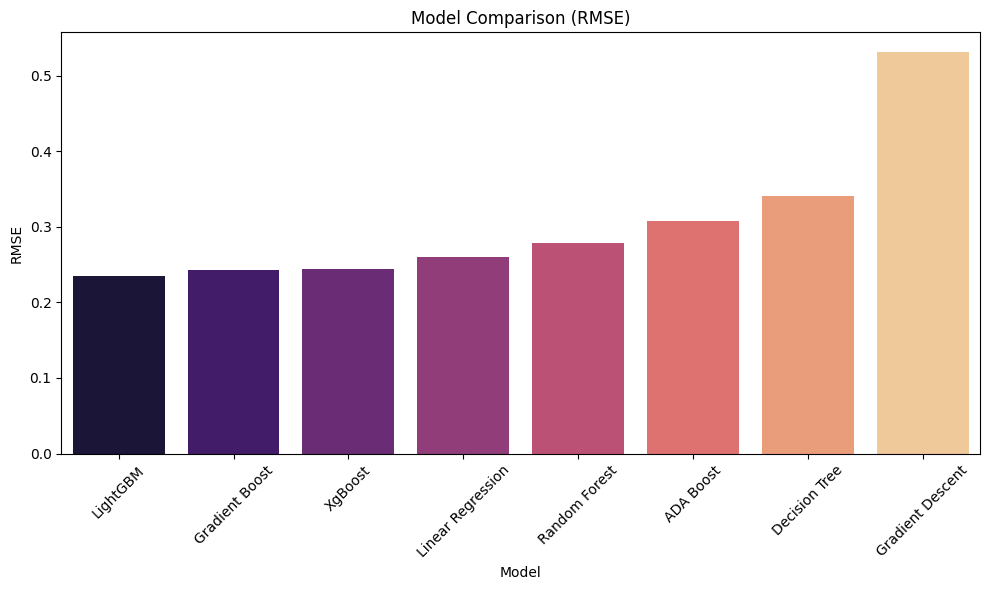

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='magma')
plt.title('Model Comparison (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

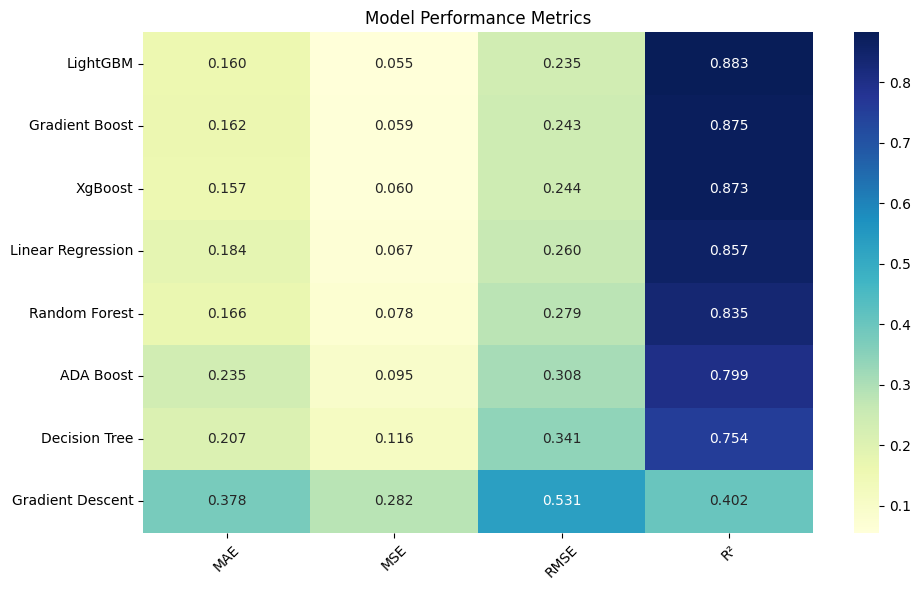

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title("Model Performance Metrics")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap displays the performance of different machine learning models evaluated on multiple regression metrics, including R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This comparison helps identify which model performs best overall by providing a clear visual summary of each model’s prediction accuracy and error values.”



In [ ]:
gb_model=models['Gradient Boost']
y_pred=gb_model.predict(X_test_tr)

results_gb = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Error': y_test - y_pred,
    'Absolute Error': np.abs(y_test - y_pred)
})

In [ ]:
results_gb

,Actual Price,Predicted Price,Error,Absolute Error
823,10.990213,11.099541,-0.109329,0.109329
814,10.239638,10.436433,-0.196795,0.196795
826,12.587897,12.507463,0.080434,0.080434
503,11.512835,11.586860,-0.074025,0.074025
67,11.918331,12.248759,-0.330428,0.330428
...,...,...,...,...
914,12.128062,11.502440,0.625623,0.625623
520,10.668746,10.569250,0.099496,0.099496
49,9.573227,9.832262,-0.259035,0.259035
728,10.711993,10.469015,0.242977,0.242977


Checking the performance of testing data

Applying Hyperparameter Tunning on all models to improve the performance of the models

In [ ]:
param_grid_sgd = {
    'loss': ['squared_error', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter' : [100,250,500,1000],
    'early_stopping' : [True, False]
}

print("Tuning Hyperparameters for: SGDRegressor")

sgd = SGDRegressor()

grid_sgd = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid_sgd,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_sgd.fit(X_train_tr, y_train)

print("\nBest Parameters for SGDRegressor:", grid_sgd.best_params_)
print("Best Cross-Validated R² Score:", grid_sgd.best_score_)

Tuning Hyperparameters for: SGDRegressor

Best Parameters for SGDRegressor: {'alpha': 0.0001, 'early_stopping': True, 'loss': 'squared_error', 'max_iter': 500, 'penalty': 'l2'}
Best Cross-Validated R² Score: 0.5926898006475926


In [ ]:
y_pred_sgd = grid_sgd.best_estimator_.predict(X_test_tr)

r2_sgd = r2_score(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

print("\n--- SGDRegressor Performance on Test Set ---")
print("R² Score:", r2_sgd)
print("RMSE:", rmse_sgd)


--- SGDRegressor Performance on Test Set ---
R² Score: -0.2613414702377155
RMSE: 0.7704161172570602


In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 15, 20,None],
    'splitter' : ['best','random'],
    'max_depth' : [10,15,20,None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

print("Tuning Hyperparameters for: DecisionTreeRegressor")

dt = DecisionTreeRegressor(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train_tr, y_train)

print("\nBest Parameters for DecisionTreeRegressor:", grid_dt.best_params_)
print("Best Cross-Validated R² Score:", grid_dt.best_score_)

Tuning Hyperparameters for: DecisionTreeRegressor

Best Parameters for DecisionTreeRegressor: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Cross-Validated R² Score: 0.809098527140159


In [ ]:
y_pred_dt = grid_dt.best_estimator_.predict(X_test_tr)

r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("\n--- DecisionTreeRegressor Performance on Test Set ---")
print("R² Score:", r2_dt)
print("RMSE:", rmse_dt)


--- DecisionTreeRegressor Performance on Test Set ---
R² Score: 0.8087622889642587
RMSE: 0.2999824107042009


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 250, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

print("Tuning Hyperparameters for: RandomForestRegressor")

rf = RandomForestRegressor()

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='r2',
    cv=5,
    n_jobs=-1,
)

grid_rf.fit(X_train_tr, y_train)

print("\nBest Parameters for RandomForestRegressor:", grid_rf.best_params_)
print("Best Cross-Validated R² Score:", grid_rf.best_score_)

Tuning Hyperparameters for: RandomForestRegressor

Best Parameters for RandomForestRegressor: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Cross-Validated R² Score: 0.9023610428148917


In [ ]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test_tr)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n--- RandomForestRegressor Performance on Test Set ---")
print("R² Score:", r2_rf)
print("RMSE:", rmse_rf)


--- RandomForestRegressor Performance on Test Set ---
R² Score: 0.8830297948095795
RMSE: 0.23461006956706185


In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential']
}

print("Tuning Hyperparameters for: AdaBoostRegressor")

ada = AdaBoostRegressor()

grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='r2',
    cv=5,
    n_jobs=-1,
)

grid_ada.fit(X_train_tr, y_train)

print("\nBest Parameters for AdaBoostRegressor:", grid_ada.best_params_)
print("Best Cross-Validated R² Score:", grid_ada.best_score_)

Tuning Hyperparameters for: AdaBoostRegressor

Best Parameters for AdaBoostRegressor: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 500}
Best Cross-Validated R² Score: 0.8277253895812471


In [ ]:
y_pred_ada = grid_ada.best_estimator_.predict(X_test_tr)

r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))

print("\n--- AdaBoostRegressor Performance on Test Set ---")
print("R² Score:", r2_ada)
print("RMSE:", rmse_ada)


--- AdaBoostRegressor Performance on Test Set ---
R² Score: 0.8177272261231636
RMSE: 0.29286665292555764


In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

print("Tuning Hyperparameters for: GradientBoostingRegressor")

gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_gb.fit(X_train_tr, y_train)

print("\nBest Parameters for GradientBoostingRegressor:", grid_gb.best_params_)
print("Best Cross-Validated R² Score:", grid_gb.best_score_)

Tuning Hyperparameters for: GradientBoostingRegressor

Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 0.8}
Best Cross-Validated R² Score: 0.9148565749414648


In [ ]:
y_pred_gb = grid_gb.best_estimator_.predict(X_test_tr)

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("\n--- GradientBoostingRegressor Performance on Test Set ---")
print("R² Score:", r2_gb)
print("RMSE:", rmse_gb)


--- GradientBoostingRegressor Performance on Test Set ---
R² Score: 0.8970556766440838
RMSE: 0.22009502407454437


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

print("Tuning Hyperparameters for: XGBRegressor")

xgb = XGBRegressor()

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='r2',
    cv=5,
    n_jobs=-1,
)

grid_xgb.fit(X_train_tr, y_train)

print("\nBest Parameters for XGBRegressor:", grid_xgb.best_params_)
print("Best Cross-Validated R² Score:", grid_xgb.best_score_)

Tuning Hyperparameters for: XGBRegressor

Best Parameters for XGBRegressor: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validated R² Score: 0.9128760501812124


In [ ]:
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_tr)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n--- XGBRegressor Performance on Test Set ---")
print("R² Score:", r2_xgb)
print("RMSE:", rmse_xgb)


--- XGBRegressor Performance on Test Set ---
R² Score: 0.8826070941229929
RMSE: 0.23503359795695264


In [ ]:
param_grid_lgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

print("Tuning Hyperparameters for: LGBMRegressor")

lgb = LGBMRegressor()

grid_lgb = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid_lgb,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_lgb.fit(X_train_tr, y_train)

print("\nBest Parameters:", grid_lgb.best_params_)
print("Best Cross-Validated R² Score:", grid_lgb.best_score_)

Tuning Hyperparameters for: LGBMRegressor

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}
Best Cross-Validated R² Score: 0.8936825950776519


In [ ]:
y_pred_lgb = grid_lgb.best_estimator_.predict(X_test_tr)

r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print("\n--- LGBMRegressor Test Set Performance ---")
print("R² Score:", r2_lgb)
print("RMSE:", rmse_lgb)


--- LGBMRegressor Test Set Performance ---
R² Score: 0.8815105295742582
RMSE: 0.23612876824267243


In [ ]:
results = {
    'Model': ['SGD Regressor', 'Decision Tree', 'Random Forest',
              'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'R2': [r2_sgd, r2_dt, r2_rf, r2_ada, r2_gb, r2_xgb, r2_lgb],
    'RMSE': [rmse_sgd, rmse_dt, rmse_rf, rmse_ada, rmse_gb, rmse_xgb, rmse_lgb]
}

In [ ]:
df_results = pd.DataFrame(results)

In [ ]:
df_results

,Model,R2,RMSE
0,SGD Regressor,-0.261341,0.770416
1,Decision Tree,0.808762,0.299982
2,Random Forest,0.883030,0.234610
3,AdaBoost,0.817727,0.292867
4,Gradient Boosting,0.897056,0.220095
5,XGBoost,0.882607,0.235034
6,LightGBM,0.881511,0.236129


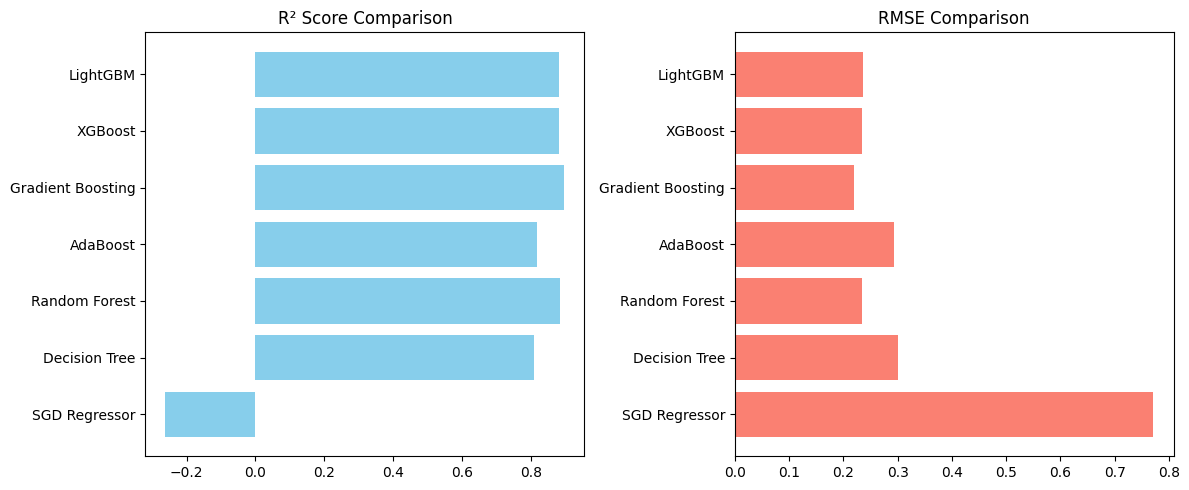

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(df_results['Model'], df_results['R2'], color='skyblue')
plt.title('R² Score Comparison')
plt.subplot(1, 2, 2)
plt.barh(df_results['Model'], df_results['RMSE'], color='salmon')
plt.title('RMSE Comparison')
plt.tight_layout()
plt.show()